In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from pathlib import Path

In [ ]:
# export
class Options():
    def __init__(self):
        # paths
        self.data_path = Path('data')
        self.model_path = Path('model')
        
        # train options
        self.actions = 'All'
        self.attempt_id = '01'
        self.attempt_path = Path('model')/self.attempt_id
        
        self.load_ckpt = False
        
        # train hyper-params
        self.bs = 128
        self.epochs = 10
        self.lr = 1e-3
        
        # model hyper-params
        self.size = 1024
        self.stages = 2
        self.dropout = 0.5

In [ ]:
# export
options = Options()

In [ ]:
train_loss_lists = []
train_mean = []
train_max = []
train_min = []
for i in range(options.epochs):
    tll = torch.load(options.attempt_path/f'train_loss_list_e{i}.pt')
    train_mean.append(np.mean(tll))
    train_max.append(np.max(tll))
    train_min.append(np.min(tll))
    train_loss_lists.append(tll)

In [ ]:
test_loss_lists = []
test_mean = []
test_max = []
test_min = []
for i in range(options.epochs):
    tll = torch.load(options.attempt_path/f'test_loss_list_e{i}.pt')
    test_mean.append(np.mean(tll))
    test_max.append(np.max(tll))
    test_min.append(np.min(tll))
    test_loss_lists.append(tll)

In [ ]:
test_mean

[0.05828409053074384,
 0.04996376345518618,
 0.046002125642892376,
 0.04507989156536623,
 0.043278035388022024,
 0.04382986145055936,
 0.04366219976634612,
 0.04271084520496473,
 0.043402563580296684,
 0.043738594483488914]

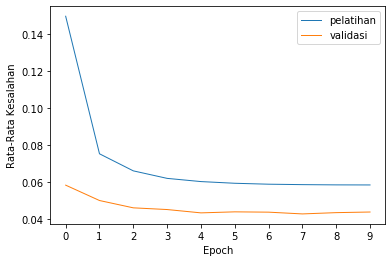

In [ ]:
plt.ylabel("Rata-Rata Kesalahan")
plt.xlabel("Epoch")

plt.plot(train_mean, label="pelatihan", linewidth=1)
plt.plot(test_mean, label="validasi", linewidth=1)
plt.xticks(range(0, 10))

plt.legend()
plt.savefig("brrr.jpg", dpi=500)
plt.show()

In [ ]:
train_lls = np.hstack(train_loss_lists)
test_lls = np.hstack(test_loss_lists)

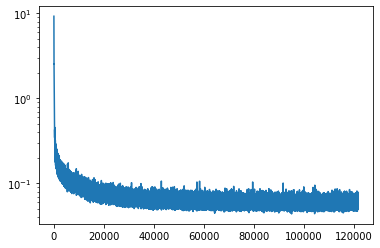

In [ ]:
plt.yscale("log")
plt.plot(train_lls)
# plt.plot(test_lls)
plt.show()

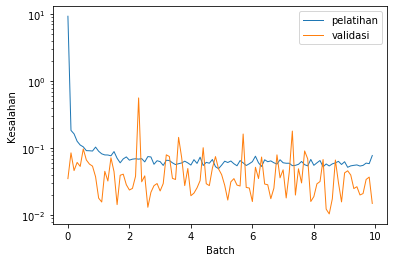

In [ ]:
train_idx = np.linspace(0, len(train_lls)-1, 100).astype(int)
train_relax = train_lls[train_idx]

test_idx = np.linspace(0, len(test_lls)-1, 100).astype(int)
test_relax = test_lls[test_idx]

plt.yscale("log")
plt.ylabel("Kesalahan")
plt.xlabel("Batch")

plt.plot(train_relax, label="pelatihan", linewidth=1)
plt.plot(test_relax, label="validasi", linewidth=1)

plt.gca().set_xticklabels(['{}'.format(int(x/10)) for x in plt.gca().get_xticks()]) 

plt.legend()
plt.savefig("batch.jpg", dpi=500)
plt.show()